<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q10_SVM_Naive_Bayes_Decision_tree_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

1pima-indians-diabetes.data.csv  sample_data


In [2]:
# Optional: Download the dataset
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
           "BMI","DiabetesPedigreeFunction","Age","Outcome"]
df = pd.read_csv(url, names=columns)
df.to_csv("pima-indians-diabetes.data.csv", index=False)



📊 Performance Metrics for All Models:

               Accuracy    Recall  Precision  F1-score       AUC
SVM            0.746753  0.611111   0.647059  0.628571  0.793333
Naive Bayes    0.707792  0.648148   0.573770  0.608696  0.772778
Decision Tree  0.720779  0.481481   0.634146  0.547368  0.665741
KNN            0.707792  0.537037   0.591837  0.563107  0.745833


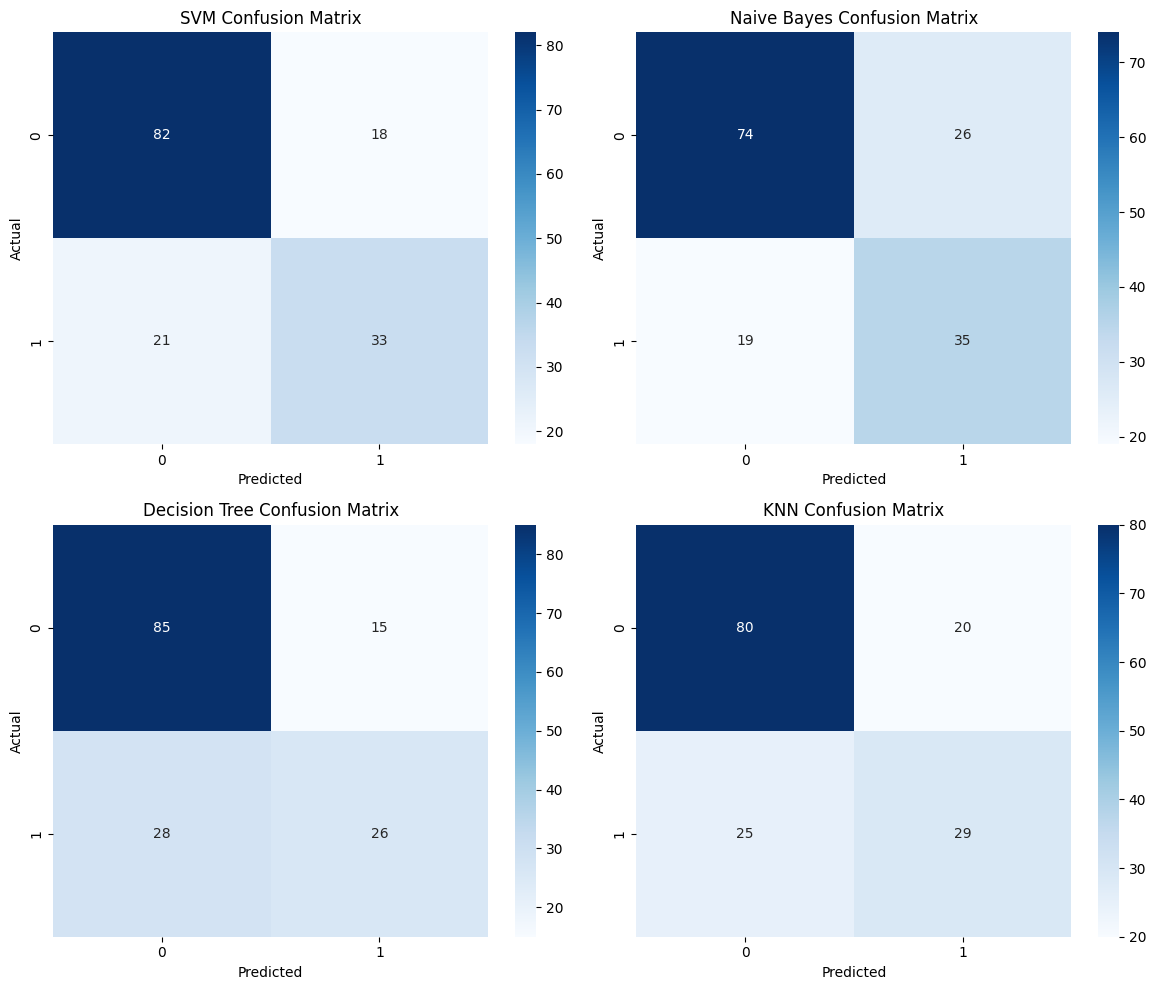

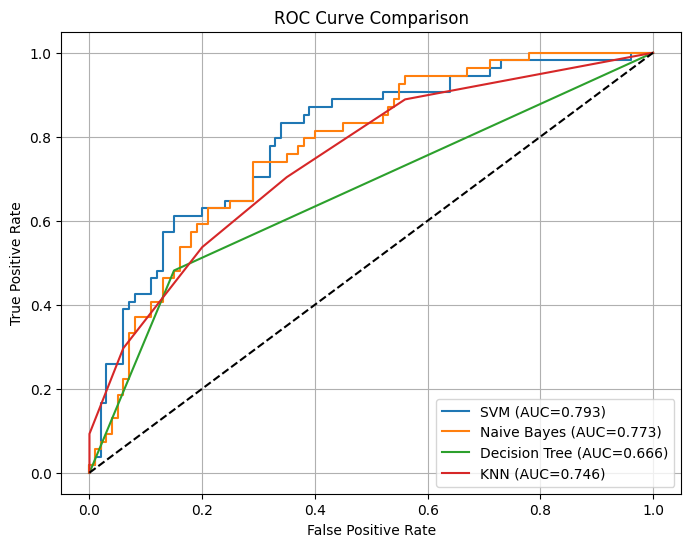

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("pima-indians-diabetes.data.csv")

# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = {}

# Training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    results[name] = {
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-score": f1,
        "Confusion Matrix": cm,
        "FPR": fpr,
        "TPR": tpr,
        "AUC": roc_auc
    }

# Display metrics in table form
metrics_df = pd.DataFrame({
    model: {
        "Accuracy": results[model]["Accuracy"],
        "Recall": results[model]["Recall"],
        "Precision": results[model]["Precision"],
        "F1-score": results[model]["F1-score"],
        "AUC": results[model]["AUC"]
    } for model in results
}).T

print("\n📊 Performance Metrics for All Models:\n")
print(metrics_df)

# --- Plot Confusion Matrix Heatmaps ---
plt.figure(figsize=(12, 10))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(res["Confusion Matrix"], annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- Plot ROC Curve for comparison ---
plt.figure(figsize=(8, 6))
for name, res in results.items():
    plt.plot(res["FPR"], res["TPR"], label=f"{name} (AUC={res['AUC']:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
